In [497]:
import random
import numpy as np
class Person:
    def __init__(self, gender ):
        self.gender = gender
        self.perfer = {}
        self.hate = []
        self.partner = False
        self.refuse_list = []
        self.satisfaction = 0
        
    def make_perfer_list( self, _person_list ):
        self.perfer = {}
        self.perfer2 = {}
        self.hate = []
        person_list = _person_list.copy()
        random.shuffle(person_list)
        max_len = len(person_list)
        
        score=len(person_list) +1
        for i in person_list :
            self.perfer2[i] = score
            score -= 1
        
        hate_start = int( len(person_list)/4)
        
        self.hate = person_list[max_len-hate_start:]
        
        for i in person_list[:max_len-hate_start]:
            self.perfer[i] = self.perfer2[i]
            
        
    def choose_paranter( self, person1 ):
        for i in self.perfer:
            if person1.partner:
                return 'married'
            elif person1 in self.refuse_list:
                return False
            elif self in person1.hate:
                self.refuse_list.append(person1)
            elif self in person1.perfer:
                self.partner = person1
                self.satisfaction = self.perfer[person1]

                person1.partner = self
                person1.satisfaction = person1.perfer[self]

                return 'choose_it'
        return False
    
            
            

In [514]:
def person_generate(gender, amount):
    all_person = []
    for i in range(amount):
        all_person.append( Person(gender) )
    return all_person

def make_perfer(mlist, fmlist):
    for i in mlist:
        i.make_perfer_list(fmlist)
    for i in fmlist:
        i.make_perfer_list(mlist)

def choose_partner(msiglist, fmsiglist, mate_list):
    while len(msiglist) >0:
        make_perfer(msiglist , fmsiglist)
        for i in msiglist:
            for j in i.perfer:
                make_choise = i.choose_paranter(j)
                if make_choise == 'married':
                    pass
                elif  make_choise == 'choose_it':
                    msiglist.remove(i)
                    fmsiglist.remove(j)
                    mate_list.append((i,j))
                    make_choise = False
                    break
    

In [515]:
single_male_list = person_generate('boy', 200)
male_list = single_male_list[:]
single_female_list = person_generate('girl', 200)
female_list = single_female_list[:]
mate_list = []
make_perfer(single_male_list , single_female_list)

In [516]:
choose_partner(single_male_list , single_female_list, mate_list)

In [517]:
# choose_partner(single_female_list , single_male_list, mate_list)

In [518]:
male_score = []
for i in male_list:
    male_score.append(i.satisfaction)
# male_score = sorted(male_score)
female_score = []
for i in female_list:
    female_score.append(i.satisfaction)
# female_score = sorted(female_score)

In [519]:
sum(male_score)

26684

In [520]:
sum(female_score)

17620

In [521]:
import matplotlib.pyplot as plt

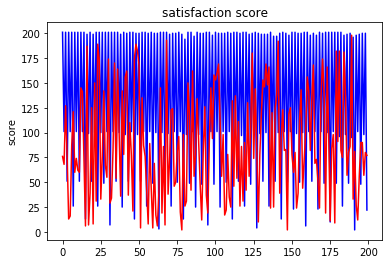

In [522]:
plt.title('satisfaction score')
plt.plot( male_score, color='blue', label='boy satisfaction')
plt.plot( female_score, color='red', label='girl satisfaction')
plt.xlabel(' ')
plt.ylabel('score')
plt.show()

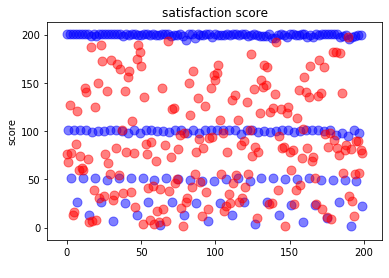

In [524]:
plt.title('satisfaction score')
x_axis = [x for x in range(len(male_score))]
plt.scatter( x_axis, male_score, color='blue', label='boy satisfaction',s=80,alpha=0.5)
plt.scatter( x_axis, female_score, color='red', label='girl satisfaction',s=80,alpha=0.5)
plt.xlabel(' ')
plt.ylabel('score')
plt.show()